In [0]:
!pip install tensorboardcolab

In [0]:
# !pip install six numpy scipy Pillow matplotlib scikit-image opencv-python imageio Shapely

In [0]:
# !pip install imgaug

In [3]:
#main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# import the necessary Deep learning packages
import tensorflow as tf
import keras
from keras import backend as K
from keras.backend import tensorflow_backend


#preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.preprocessing import  MinMaxScaler
from keras.preprocessing.image import img_to_array
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator,load_img

#modelcreation libraries
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Activation,Flatten,Dropout,Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau
from tensorboardcolab import  TensorBoardColab, TensorBoardColabCallback


#import data read/write packages
import glob
import os
from tqdm import tqdm
from os import walk

## required for efficient GPU use
config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))
session = tf.Session(config=config)
tensorflow_backend.set_session(session)

Using TensorFlow backend.


In [0]:
tbc=TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
http://a272aea5.ngrok.io


In [4]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
os.chdir("/content/drive/My Drive/dilab")
!ls

 19500_left.jpeg    19810_right.jpeg   20089_left.jpeg
 19500_right.jpeg   19811_left.jpeg    20089_right.jpeg
 19503_left.jpeg    19811_right.jpeg   2008_left.jpeg
 19503_right.jpeg   19812_left.jpeg    2008_right.jpeg
 19504_left.jpeg    19812_right.jpeg   20090_left.jpeg
 19504_right.jpeg   19813_left.jpeg    20090_right.jpeg
 19505_left.jpeg    19813_right.jpeg   20091_left.jpeg
 19505_right.jpeg   19815_left.jpeg    20091_right.jpeg
 19506_left.jpeg    19815_right.jpeg   20092_left.jpeg
 19506_right.jpeg   1981_left.jpeg     20092_right.jpeg
 19507_left.jpeg    1981_right.jpeg    20093_left.jpeg
 19507_right.jpeg   19821_left.jpeg    20093_right.jpeg
 19508_left.jpeg    19821_right.jpeg   20095_left.jpeg
 19508_right.jpeg   19823_left.jpeg    20095_right.jpeg
 19510_left.jpeg    19823_right.jpeg   20098_left.jpeg
 19510_right.jpeg   19828_left.jpeg    20098_right.jpeg
 19512_left.jpeg    19828_right.jpeg   20100_left.jpeg
 19512_right.jpeg   1982_left.jpeg     20100_right.jpeg
 19

In [0]:
img_size = 224
batch_size = 32
# rescale_factor = 0.8
epochs = 300
num_classes = 5

## Paths for IDRID Dataset

In [0]:
train_path = './B. Disease Grading/1. Original Images/a. Training Set/*.jpg'
test_path = './B. Disease Grading/1. Original Images/b. Testing Set/*jpg'
train_label_path = './B. Disease Grading/2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv'
test_label_path = './B. Disease Grading/2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv'

## Path for Messidor Dataset

In [0]:
messi_data_path = './messidor/data/'

## Function to read Messidor data

In [0]:
# def read_messidor(data_path):
#     x = []
#     y = []
#     for (dirpath, dirnames, filenames) in walk(data_path):
#         print(dirnames)
#         break

#     k = 0
#     for direc in tqdm(dirnames):
#         direc_path = os.path.join(data_path,direc)
#         label_path = glob.glob("{}/*.xls".format(direc_path))[0]
#         img_paths =("{}/*.tif".format(direc_path))
#         img_files = np.sort(glob.glob(img_paths))
#         df = pd.read_excel(label_path)

#         if(k==0):
#             x = (np.array([np.array(load_img(img,target_size=(img_size,img_size,3))) 
#                             for img in (img_files)]))
#             y = df.iloc[:,2].values
#             k+=1
#         else:
#             x = np.vstack((x,(np.array([np.array(load_img(img,target_size=(img_size,img_size,3))) 
#                                 for img in (img_files)]))))
#             y = np.concatenate((y,(df.iloc[:,2].values)))
            
#     return x,y

In [0]:
# read_messidor(messi_data_path)

In [8]:
print(keras.__file__)

/usr/local/lib/python3.6/dist-packages/keras/__init__.py


In [0]:
!pip install -q kaggle

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle competitions download -c diabetic-retinopathy-detection

trainLabels.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sampleSubmission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample.zip: Skipping, found more recently modified local copy (use --force to force download)
train.zip.004: Skipping, found more recently modified local copy (use --force to force download)
100% 7.80G/7.81G [03:01<00:00, 36.2MB/s]
100% 7.81G/7.81G [03:02<00:00, 46.1MB/s]
train.zip.001: Skipping, found more recently modified local copy (use --force to force download)
 52% 711M/1.34G [00:22<00:20, 33.5MB/s]
User cancelled operation


In [0]:
!apt-get -qq install -y libarchive-dev && pip install -q -U libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 110377 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.1_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.1) ...


In [0]:
import libarchive

In [0]:
os.chdir('train_01')


In [28]:
!ls -a

train.zip.004


In [29]:
!7z e train.zip.004


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 8388608000 bytes (8000 MiB)

Extracting archive: train.zip.004
  3% 256 Open              21% 1792 Open               41% 3584 Open               59% 5120 Open               66% 5632 Open               69% 5888 Open               72% 6144 Open               75% 6400 Open               78% 6656 Open               81% 6912 Open               84% 7168 Open               87% 7424 Open              

In [0]:
def add_gaussian_noise(X_imgs):
  
    gaussian_noise_imgs = []
    row, col, _ = X_imgs[0].shape
    # Gaussian distribution parameters
    mean = 0
    var = 0.1
    sigma = var ** 0.5
    
    for X_img in X_imgs:
        gaussian = np.random.random((row, col, 1)).astype(np.float32)
        gaussian = np.concatenate((gaussian, gaussian, gaussian), axis = 2)
        gaussian_img = cv2.addWeighted(X_img, 0.75, 0.25 * gaussian, 0.25, 0)
        gaussian_noise_imgs.append(gaussian_img)
    gaussian_noise_imgs = np.array(gaussian_noise_imgs, dtype = np.float32)
    
    return gaussian_noise_imgs

In [0]:
def augment():
    data_gen = ImageDataGenerator(
            rotation_range= 1,
            width_shift_range=0.1,
            height_shift_range=0.1,
            horizontal_flip=True)
    return data_gen

In [0]:
def weighted_sampling(data,labels):
    
    data_per_class = []
    data_dist = plt.hist(labels,bins=num_classes)[0]
    maj_class = np.argmax(data_dist)
    max_size = int(data_dist[maj_class])
    
    print("Majority class is {}\nData Distribution : {}".format(maj_class,data_dist))
    
    for i in range(num_classes):
        
        if(i!=maj_class):
            
            data_per_class = (data[labels==i])
            data_gen = augment()
            data_gen.fit(data_per_class)
            class_size = len(data_per_class)
            
            if(class_size<(max_size-class_size)):
                for k in range(int((max_size-class_size) // class_size)+1):
                    img_gen = data_gen.flow(data_per_class,batch_size=(max_size-class_size))
                    imags = np.vstack((imags,(next(img_gen))))
#                 print(imags.shape)
            else:
                img_gen = data_gen.flow(data_per_class,batch_size=(max_size-class_size))
                imags = next(img_gen)
                
            
            data = np.vstack((data,imags[:(max_size-class_size)]))
#             print(data.shape)
            labels = np.concatenate((labels,np.ones(max_size-class_size)*i))
#             print(labels.shape)
            shuffled_index = np.arange(len(data))
            np.random.shuffle(shuffled_index)
            data = data[shuffled_index]
            labels = labels[shuffled_index]
                
            
    return data,labels

In [0]:
def read_data(data_path=train_path,label_path=train_label_path,dir_path=None,istest=False,dataset='idrid',num_classes=5):
    
    if(dataset=='Kaggle'):
        
        img_files = np.sort(glob.glob(data_path))

        x = np.array([np.array(load_img(img,target_size=(img_size,img_size,3))) 
                            for img in tqdm(img_files)])
        
        img_files_stripped = [img_file.strip(kag_path) for img_file in img_files]
        
        labels = labels[np.isin(label_df.iloc[:,0].values,img_files_stripped)]

        
    elif(dataset=='messidor' and dir_path is not None):
       
        for (sub_dirpath, sub_dirs, filenames) in walk(dir_path):
#             print(sub_dirs)
            break

        k = 0
        for sub_dir in tqdm(sub_dirs):
            
            sub_dir_path = os.path.join(dir_path,sub_dir)
            label_path = glob.glob("{}/*.xls".format(sub_dir_path))[0]
            img_paths =("{}/*.tif".format(sub_dir_path))
            img_files = np.sort(glob.glob(img_paths))
            df = pd.read_excel(label_path)

            if(k==0):
                x = (np.array([np.array(load_img(img,target_size=(img_size,img_size,3))) 
                                for img in (img_files)]))
                labels = df.iloc[:,2].values
                k+=1
            else:
                x = np.vstack((x,(np.array([img_to_array(load_img(img,target_size=(img_size,img_size,3))) 
                                    for img in (img_files)]))))
                labels = np.concatenate((labels,(df.iloc[:,2].values)))
                
    else:
            
        img_files = np.sort(glob.glob(data_path))

        x = np.array([np.array(load_img(img,target_size=(img_size,img_size,3))) 
                            for img in tqdm(img_files)])

        label_df = pd.read_csv(label_path)
        labels = label_df.iloc[:,1].values

    
#     if(istest is False and class_weights is not None):
#            class_weights = class_weight.compute_class_weight('balanced',np.unique(labels),labels)
  #         x,labels = weighted_sampling(x,labels)
  
#   print("Training cum Validation data size: {}".format(x.shape[0]))
#         print("New Distribution :{} \n".format(plt.hist(labels,bins=num_classes)[0]))
        
#     print(label_df.head())
    y= to_categorical(labels, num_classes=num_classes)

    return x,y,labels

In [0]:
# x,y,labels = read_data(dir_path=messi_data_path,dataset='messidor',num_classes=4)

## Kaggle Dataset

In [0]:
kag_path = './kaggle/data/*.jpeg'
kag_label_path = './kaggle/labels/trainLabels.csv'

## Function to read kaggle dataset

In [0]:
# read_data(data_path=kag_path,label_path=kag_label_path,dataset='Kaggle')

In [0]:
def split_data(data,labels,ratio=0.2):
    return train_test_split(data,labels,test_size=ratio)

In [0]:
def create_model(num_classes=5):
    
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (3, 3),input_shape = (img_size, img_size, 3),
                            activation = 'relu'))
    model.add(Conv2D(filters = 32, kernel_size = (3, 3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
   
    
    model.add(Conv2D(filters = 64, kernel_size = (3, 3),activation = 'relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))
    
    
    model.add(Conv2D(filters = 128, kernel_size = (3, 3),activation = 'relu'))
    model.add(Conv2D(filters = 128, kernel_size = (3, 3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))

    
    model.add(Conv2D(filters = 256, kernel_size = (3, 3),activation = 'relu'))
    model.add(Conv2D(filters = 256, kernel_size = (3, 3),activation = 'relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
  
    model.add(Flatten())
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.25))
      
    model.add(Dense(512,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    
    return model

In [0]:
def create_modelA(num_classes=5):
    
    model = Sequential()
    
    model.add(Conv2D(filters = 32, kernel_size = (3, 3),input_shape = (img_size, img_size, 3),
                            activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.25))
   
    
    model.add(Conv2D(filters = 64, kernel_size = (3, 3),activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.25))
    
    
    model.add(Conv2D(filters = 128, kernel_size = (3, 3),activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.25))

    
    model.add(Conv2D(filters = 256, kernel_size = (3, 3),activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))

#     model.add(Conv2D(filters = 512, kernel_size = (3, 3),activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))


    model.add(Conv2D(filters = 512, kernel_size = (3, 3),activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.5))


#     model.add(Conv2D(filters = 1024, kernel_size = (3, 3),activation = 'relu'))
#     model.add(BatchNormalization())
#     model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.25))

    
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
      
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
#     model.add(Dropout(0.25))

    model.add(Dense(num_classes,activation='softmax'))
    
    return model

In [0]:
def create_modelB(num_classes=5):
    
    model = Sequential()
    
    model.add(Conv2D(filters = 64, kernel_size = (3, 3),input_shape = (img_size, img_size, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(Conv2D(filters = 128, kernel_size = (3, 3),activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    model.add(MaxPooling2D(pool_size = (2, 2)))
   
    
#     model.add(Conv2D(filters = 64, kernel_size = (3, 3),activation = 'relu'))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(Conv2D(filters = 64, kernel_size = (3, 3),activation = 'relu'))
#     model.add(BatchNormalization())
#     model.add(Activation('relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))
# #     model.add(Dropout(0.5))
    
    
#     model.add(Conv2D(filters = 128, kernel_size = (3, 3),activation = 'relu'))
#     model.add(Conv2D(filters = 128, kernel_size = (3, 3),activation = 'relu'))
#     model.add(MaxPooling2D(pool_size = (2, 2)))

    
    model.add(Conv2D(filters = 128, kernel_size = (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
#     model.add(Dropout(0.25))
    
    model.add(Conv2D(filters = 256, kernel_size = (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2, 2)))
  
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.25))
      
    model.add(Dense(1024,activation='relu'))
    model.add(Dropout(0.25))
    
    model.add(Dense(num_classes,activation='softmax'))
    
    return model

In [0]:
def augment_data(rescale_factor=(1/255.0)):

    # this is the augmentation configuration we will use for training
    train_datagen = ImageDataGenerator(
            rotation_range= 1,
            width_shift_range=0.1,
            height_shift_range=0.1,
#             rescale = rescale_factor,
#             shear_range=0.05,
            horizontal_flip=True)

    # this is the augmentation configuration we will use for testing:
    # only rescaling
    
    test_datagen = ImageDataGenerator(rescale=1.0)
    return train_datagen,test_datagen

In [0]:
# define path to save model
model_path = './weights_m3.{epoch:02d}-{val_loss:.2f}.hdf5'
# prepare callbacks

callbacks = [
    EarlyStopping(
        monitor='val_acc', 
        patience=30,
        mode='max',
        verbose=1),
    
    ModelCheckpoint(model_path,
        monitor='val_acc', 
        save_best_only=True, 
        save_weights_only=False,
        mode='max',
        verbose=0),
    
    TensorBoardColabCallback(tbc),
    
#     TensorBoard(log_dir='./logs', 
#                 histogram_freq=0,
#                 batch_size=batch_size, 
#                 write_graph=True, 
#                 write_grads=False, 
#                 write_images=False, 
#                 embeddings_freq=0,
#                 embeddings_layer_names=None, 
#                 embeddings_metadata=None),
    keras.callbacks.History(),
    ReduceLROnPlateau(monitor='val_acc', 
                                            patience=10, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0000001)
]

In [0]:
data = np.load('./messidor_data.npz')

In [0]:
x = data['a']/255.0

NameError: ignored

In [0]:
y = data['b']

In [0]:
split_data

In [0]:
# x_train,y_train,train_labels = read_data(train_path,train_label_path)

In [0]:
# x_test,y_test,test_labels = read_data(test_path,test_label_path,istest=True)

In [0]:
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')

# x_train  /= 255
# x_test /= 255

In [0]:
for i in (np.random.randint(0,high=len(x_train),size=10)):
    
    plt.imshow(x_train[i])
    plt.title("Severity : {}".format(y_train[i]))
    plt.show()

In [0]:
x_trval,x_test,y_trval,y_test = split_data(x,y,ratio=0.15)

In [0]:
x_train,x_val,y_train,y_val = split_data(x_trval,y_trval,ratio=0.1)

In [0]:
x_val.shape

(102, 224, 224, 3)

In [0]:
train_labels = np.argmax(y_train,axis=-1)
val_labels = np.argmax(y_val,axis=-1)

In [0]:
class_weights = class_weight.compute_class_weight('balanced',np.unique(train_labels),train_labels)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.5625,
 1: 1.8811475409836065,
 2: 1.2015706806282722,
 3: 1.1649746192893402}

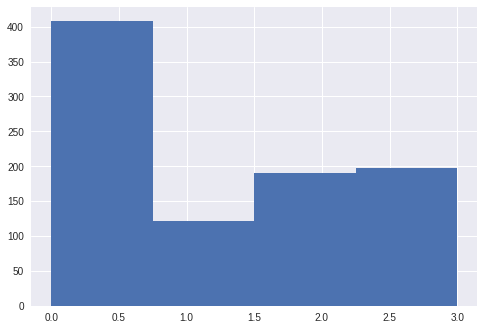

In [0]:
plt.hist(train_labels, bins=4)
plt.show()

In [0]:
# y_train = to_categorical(y_train,num_classes=num_classes)
# y_val = to_categorical(y_val,num_classes=num_classes)

In [0]:
model = create_modelA(4)

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_20 (Batc (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
batch_normalization_21 (Batc (None, 109, 109, 64)      256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 52, 52, 128)       73856     
__________

In [0]:

adam_ = keras.optimizers.Adam(lr=0.5e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer=adam_,loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
train_size = x_train.shape[0]
val_size = x_val.shape[0]

In [0]:
train_datagen,val_datagen = augment_data()

In [0]:
train_generator = train_datagen.flow(x_train,y_train,batch_size=batch_size)

In [0]:
val_generator = val_datagen.flow(x_val,y_val,batch_size=batch_size)

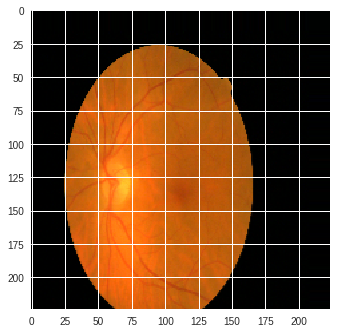

In [0]:
plt.imshow(next(train_generator)[0][0])
plt.show()

In [0]:
# model.fit(x_train,y_train,steps_per_epoch = train_size // batch_size,
#         epochs=epochs,
#         validation_data=(x_val,y_val),
#         validation_steps =  val_size // batch_size,
#         callbacks = callbacks)

# #saves weights just to be safe!
# # model.save_weights('weights_1.h5')

# model_json = model.to_json()
# with open("./saved_models/model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("./saved_models/model_weights.h5")
# print("Saved model to drive")

In [0]:
curr_epoc = 116

In [0]:
model.fit_generator(
        train_generator,
        steps_per_epoch = train_size // batch_size,
        epochs=epochs,
        initial_epoch=curr_epoc,
        validation_data=val_generator,
        validation_steps =  val_size // batch_size,
        class_weight=class_weights,
        callbacks = callbacks)

#saves weights just to be safe!
# model.save_weights('weights_1.h5')

model_json = model.to_json()
with open("./saved_models/model3_BN.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("./saved_models/model_weights3_BN.h5")
print("Saved model to drive")

Epoch 117/300
28/28 [==============================] - 13s 458ms/step - loss: 0.8735 - acc: 0.6068 - val_loss: 1.3329 - val_acc: 0.4857
Epoch 118/300
28/28 [==============================] - 11s 394ms/step - loss: 0.9053 - acc: 0.6032 - val_loss: 1.6106 - val_acc: 0.4286
Epoch 119/300
28/28 [==============================] - 11s 406ms/step - loss: 0.9062 - acc: 0.6084 - val_loss: 1.3622 - val_acc: 0.4429
Epoch 120/300
28/28 [==============================] - 12s 412ms/step - loss: 0.8949 - acc: 0.5882 - val_loss: 1.3715 - val_acc: 0.4167
Epoch 121/300
28/28 [==============================] - 11s 408ms/step - loss: 0.8970 - acc: 0.6016 - val_loss: 1.5498 - val_acc: 0.4143
Epoch 122/300
28/28 [==============================] - 11s 408ms/step - loss: 0.9022 - acc: 0.6305 - val_loss: 1.4473 - val_acc: 0.3000
Epoch 123/300
28/28 [==============================] - 11s 409ms/step - loss: 0.9032 - acc: 0.5835 - val_loss: 1.4436 - val_acc: 0.4286
Epoch 124/300
28/28 [===========================

In [0]:
model.evaluate(x_test,y_test)

180/180 [==============================] - 0s 3ms/step


[1.3315880510542129, 0.5055555568801032]

In [0]:
model.predict_classes(x_test)

array([3, 1, 3, 1, 0, 3, 0, 0, 3, 0, 1, 2, 2, 2, 2, 3, 1, 1, 0, 1, 0, 0,
       3, 2, 0, 0, 3, 0, 2, 3, 2, 3, 1, 1, 0, 1, 1, 2, 0, 0, 3, 3, 0, 2,
       1, 3, 3, 1, 2, 0, 2, 3, 1, 0, 0, 0, 1, 0, 3, 0, 2, 0, 3, 1, 1, 0,
       3, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 3, 0, 0, 3, 0, 3,
       0, 1, 3, 0, 2, 1, 3, 1, 2, 0, 1, 0, 1, 1, 1, 2, 3, 2, 1, 0, 1, 0,
       1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 1, 1, 3, 0, 0, 3, 2, 3, 1, 0, 1, 3,
       2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       1, 3, 1, 3, 1, 0, 1, 0, 0, 2, 2, 0, 0, 2, 2, 3, 2, 1, 0, 1, 3, 0,
       0, 3, 0, 0])

In [0]:
y_test

In [0]:


# Evaluating the model with best weights obtained during training
def evaluate_model(x_test,y_test):
  
  model = create_model()
#   model.load_weights('./saved_models/model_weights2_BN.h5')
#   model.load_weights('./keras_ret_trained_model2_BN.h5')
  model.load_weights('./weights_m1.04-1.59.hdf5')

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  scores = model.evaluate(x_test, y_test, verbose=1)

  
  print("Test Accuracy: %.2f%%" % (scores[1]*100))

In [0]:
evaluate_model(x_test,y_test)

NameError: ignored